In [ ]:
! pip install pandas
! pip install seaborn
! pip install scikit-learn

In [1]:
# Import necessary libraries
import pandas, numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Load the dataset
df = pandas.read_csv('/Users/mlabhishek/Documents/GitHub/Abhishek-Test-Bunker/US_Accidents_March23.csv')

# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [3]:
print(df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=numpy.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Check correlation for numerical columns
correlation_matrix = df[numerical_cols].corr()
irrelevant_numerical_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) < 0.1:  # You can adjust the correlation threshold
            colname = correlation_matrix.columns[i]
            irrelevant_numerical_cols.add(colname)

# Check independence for categorical columns using Chi-squared test
irrelevant_categorical_cols = set()
for col in categorical_cols:
    contingency_table = pandas.crosstab(df[col], df['Severity'])
    _, p, _, _ = chi2_contingency(contingency_table)
    if p > 0.1:  # You can adjust the significance level
        irrelevant_categorical_cols.add(col)

print("Most Irrelevant Numerical Columns:", irrelevant_numerical_cols)
print("Most Irrelevant Categorical Columns:", irrelevant_categorical_cols)


In [4]:
# Drop irrelevant columns
df.drop(['ID', 'End_Time', 'End_Lat', 'End_Lng', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp'], axis=1, inplace=True)

# Handle missing values
df.dropna(subset=['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Wind_Chill(F)', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], inplace=True)

In [5]:
df.isnull().sum()

Source                   0
Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

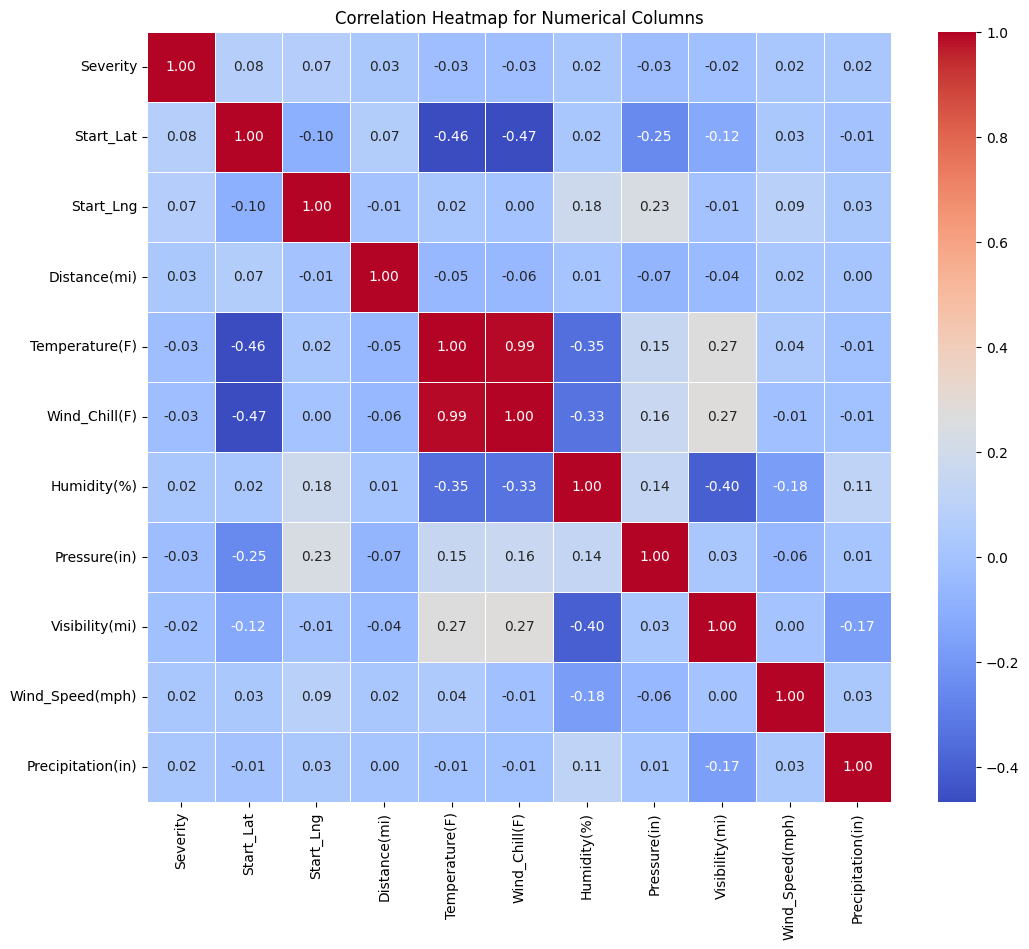

In [6]:
# Separate numerical columns
numerical_cols = df.select_dtypes(include=numpy.number)

# Create a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


Correlation with Target (Severity):
 Severity             1.000000
Start_Lat            0.076677
Start_Lng            0.069117
Junction             0.032896
Distance(mi)         0.029936
Wind_Speed(mph)      0.023803
Humidity(%)          0.021464
Precipitation(in)    0.015168
Roundabout          -0.001237
Traffic_Calming     -0.002322
Bump                -0.002855
Give_Way            -0.003065
No_Exit             -0.008103
Railway             -0.008724
Visibility(mi)      -0.019102
Amenity             -0.023426
Temperature(F)      -0.025367
Wind_Chill(F)       -0.028394
Pressure(in)        -0.031053
Stop                -0.034406
Station             -0.040302
Traffic_Signal      -0.078989
Crossing            -0.087302
Turning_Loop              NaN
Name: Severity, dtype: float64


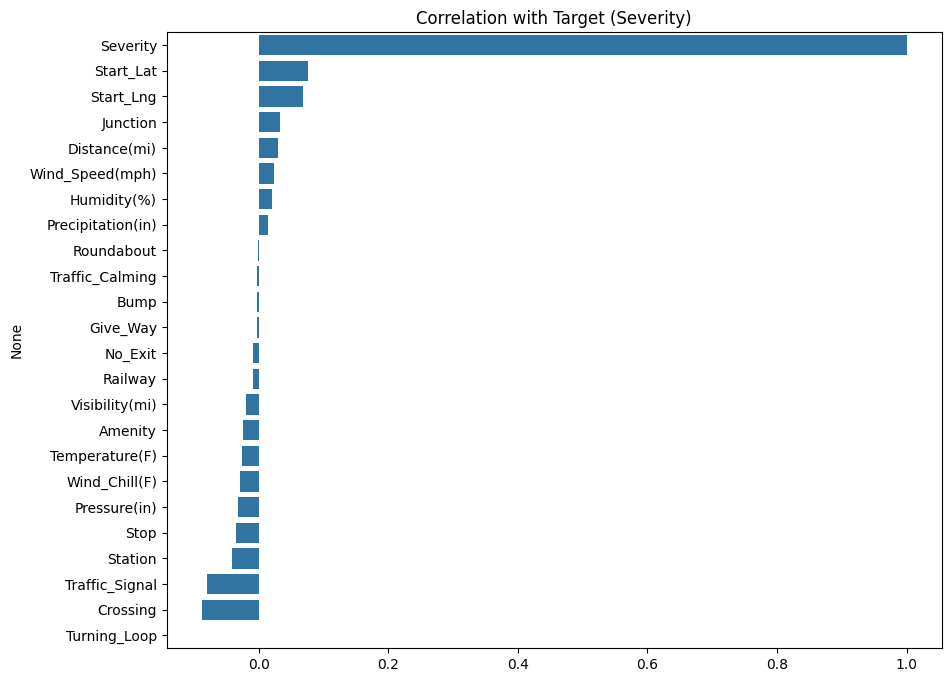

In [7]:
# Calculate correlation with the target variable for numerical columns
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Severity'].sort_values(ascending=False)

# Display the correlation values
print("Correlation with Target (Severity):\n", correlation_with_target)

# Visualize correlation values
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, orient='h')
plt.title('Correlation with Target (Severity)')
plt.show()


In [9]:
# Encode categorical columns
categorical_cols = ['Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df_encoded = pandas.get_dummies(df, columns=categorical_cols, drop_first=True)

non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
df = df.drop(non_numeric_cols, axis=1)



In [10]:
# Split the data into features and target variable
X = df.drop('Severity', axis=1)
y = df['Severity']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [11]:
# print(df.dtypes)

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# Standardize the features
scaler = StandardScaler()
# min_max_scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predictions on the validation set using the best model
y_val_pred = best_rf_model.predict(X_val_scaled)


# # Machine Learning Model
# # Random Forest Classifier
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Predictions
# y_val_pred = rf_model.predict(X_val_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

KeyboardInterrupt: 

In [ ]:
# Recommendations on the Research
# Analyze feature importance
feature_importance = pandas.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()